In [1]:
%matplotlib inline
import numpy as np
from numpy import mean,cov,cumsum,dot,linalg,size,flipud
import matplotlib.pyplot as plt
import pandas as pd
import time
import math as math

# Principal Component Analysis and SVD

- Given a data matrix $X$, we can either compute the eigendecomposition of the matrix $W = X^T X$ or carry out the singular value decomposition of the matrix $X$ to find the components, transformed data, and explained variance. The SVD can be applied to any matrix while the eigendecomposition is only applicable to diagonalizable matrices.

- In the SVD, we write $X = U \Sigma V^T$. $U$ is the left singular vectors, $V$ is the right singular vectors, and $\Sigma$ contains the singular values on the diagonal, denoted by $\sigma_1, \sigma_2, ..., \sigma_n$.

- Singular values in $\Sigma$ are not identical to the eigenvalues of $W$, but are ordered in the diagonalized matrix $\Sigma$ and correspond to the rows and columns of $U$ and $V$.

- We have $U^* U = I$ and $V^* V = I$, orthonormal vectors. 

- The colums of U (the left singular vectors) are the eigenvectors of $X X^T$ and the columns of V ( the right singular vectors) are the eigenvectors of $X^T X$. 

- We have $T = XV = U\Sigma V^T V = U \Sigma$

- There are more efficient algorithms for finding the SVD of a matrix without computing the matrix $X^T X$ and are therefore used to calculate PCA from a given matrix.

- We will walk through the basic implementations of PCA before proceeding to compare their accuracy, speed, and improve on them using the Jacobi rotation.

## PCA using eigendecomposition of covariance matrix

Below is an implementation of PCA using the eigendecomposition of the covariance matrix. It is applied to the data set Spellman.csv and returns 10 principal components. It has a runtime of ~50 s.

In [2]:
def PCA(name, numpc):
    
    A = pd.read_csv(name)
    A = np.array(A.iloc[:,1:]) # This step is specific to the Spellman.csv file to remove the first column
    M = (A - np.mean(A, axis = 0)).T # subtract the mean (along columns)
    [val,vec] = linalg.eig(cov(M))
    
    p = size(vec,axis=1)
    index = np.argsort(val) # sorting the eigenvalues
    index = index[::-1]       # in ascending order
    
    # sorting eigenvectors according to the sorted eigenvalues
    vec = vec[:,index]
    val = val[index] # sorting eigenvalues
    
    if numpc < p and numpc >= 0:
        vec = vec[:,range(numpc)] # cutting some PCs if needed
    score = dot(vec.T,M) # projection of the data in the new space
    return score.T, val[:numpc], vec.T

start_time = time.time()

score1, val1, vec1 = PCA('Spellman.csv', 10)


print(val1)

print(vec1)

print(score1)

print("--- %s seconds ---" % (time.time() - start_time))




[235.50172182+0.j 123.19852557+0.j 113.86092719+0.j  55.12329321+0.j
  53.14661104+0.j  33.60347468+0.j  28.05984317+0.j  24.80417358+0.j
  20.5636625 +0.j  18.13889671+0.j]
[[ 7.14445411e-03+0.j -7.47295032e-03+0.j -1.31594614e-02+0.j ...
   3.05874972e-02+0.j -2.66811931e-02+0.j -2.14325097e-02+0.j]
 [ 1.20741211e-03+0.j  4.70149386e-03+0.j -3.54778845e-05+0.j ...
  -1.18248037e-02+0.j  1.20241582e-02+0.j  1.99340255e-02+0.j]
 [-1.45178046e-02+0.j -2.17598908e-03+0.j -4.50920874e-04+0.j ...
   9.58959750e-03+0.j -2.44864675e-02+0.j -1.79536519e-02+0.j]
 ...
 [-7.32517694e-03+0.j -1.93824994e-03+0.j -7.03244985e-03+0.j ...
   3.00172411e-02+0.j -4.76846278e-03+0.j -3.96291502e-02+0.j]
 [ 5.52210565e-03+0.j  1.02511141e-02+0.j  9.21126041e-04+0.j ...
   1.31718194e-02+0.j -4.71804087e-03+0.j  1.43539550e-02+0.j]
 [ 1.79824692e-02+0.j  1.03062238e-02+0.j  1.48932593e-02+0.j ...
   1.31707481e-02+0.j  1.65069456e-02+0.j  2.00622126e-02+0.j]]
[[-1.91350815e+01+0.j -1.22573679e+01+0.j -1.3

The components and singular values computed from the PCA package were used to plot the transformed data on the two principal components, plot the cumulative explained variance, and measure the error compared to the first PCA function, demonstrating significant time reduction.

[71.97942678 52.06119056 50.0493796  34.82402117 34.19393869 27.18963852
 24.84585578 23.36004749 21.26971022 19.97637923]
[[ 7.14445411e-03 -7.47295033e-03 -1.31594614e-02 ...  3.05874972e-02
  -2.66811931e-02 -2.14325096e-02]
 [ 1.20741207e-03  4.70149378e-03 -3.54778711e-05 ... -1.18248037e-02
   1.20241581e-02  1.99340256e-02]
 [-1.45178046e-02 -2.17598909e-03 -4.50920873e-04 ...  9.58959750e-03
  -2.44864675e-02 -1.79536519e-02]
 ...
 [-7.32521894e-03 -1.93832739e-03 -7.03243762e-03 ...  3.00172084e-02
  -4.76848222e-03 -3.96290610e-02]
 [-5.52189567e-03 -1.02507275e-02 -9.21186055e-04 ... -1.31716572e-02
   4.71813787e-03 -1.43543984e-02]
 [-1.79823407e-02 -1.03059871e-02 -1.48932953e-02 ... -1.31706499e-02
  -1.65068867e-02 -2.00624847e-02]]
--- 0.41463613510131836 seconds ---
[[-1.91350815e+01 -1.22573679e+01 -1.37852917e+01  4.42907759e+00
   1.16717584e+01  6.73351576e+00  4.31892863e+00  1.63336727e+00
   1.13263282e+00  9.41051210e-01]
 [-2.04076470e+01 -1.64827581e+01 -1.2

Text(0, 0.5, 'component 2')

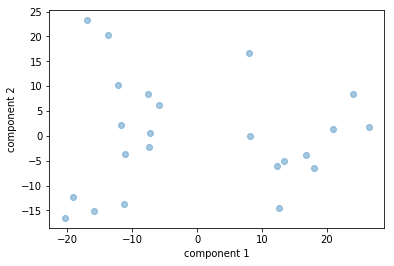

In [16]:
from sklearn.decomposition import PCA

start_time = time.time()

data1 = pd.read_csv('Spellman.csv')
A = np.array(data1.iloc[:,1:])
pca = PCA(n_components=10)
pca.fit(A)

print(pca.singular_values_)
print(pca.components_)

print("--- %s seconds ---" % (time.time() - start_time))


print(pca.transform(A))

A_pca = pca.transform(A)
plt.scatter(A_pca[:, 0], A_pca[:, 1], alpha=0.4)
plt.xlabel('component 1')
plt.ylabel('component 2')





Text(0, 0.5, 'cumulative explained variance')

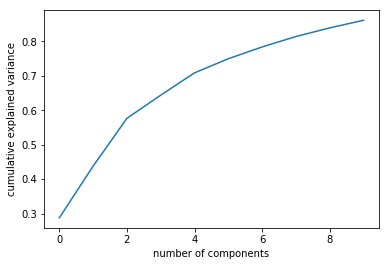

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

[235.50172182+0.j 123.19852557+0.j 113.86092719+0.j  55.12329321+0.j
  53.14661104+0.j  33.60347468+0.j  28.05984317+0.j  24.80417358+0.j
  20.5636625 +0.j  18.13889671+0.j]


/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


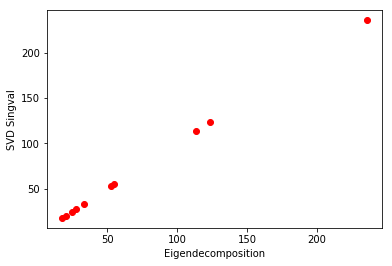

In [18]:
plt.plot(val1, (pca.singular_values_**2)/22, 'ro')
plt.xlabel('Eigendecomposition')
plt.ylabel('SVD Singval');

print(val1)

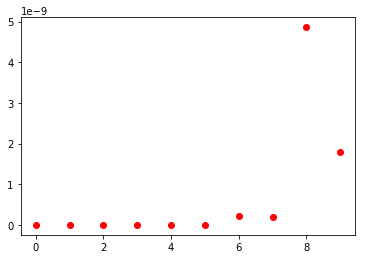

In [19]:
errors = (val1 - (pca.singular_values_**2)/22)/((pca.singular_values_**2)/22)
plt.plot(errors, 'ro')

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0, 0.5, 'component 2')

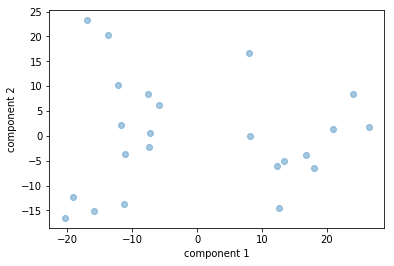

In [20]:
# scatterplot to show that the transformed data of the first function matches
# the transformed data of the PCA package

plt.scatter(score1[:, 0], score1[:, 1], alpha=0.4)
plt.xlabel('component 1')
plt.ylabel('component 2')

- Singular values calculated from SVD are more numerically stable (higher numerical accuracy) than the eigenvalues calculated from the eigendecomposition of the covariance matrix. However, measurement error may be more of a contributing factor than calculation error from SVD vs eigendecomposition.

- The EIG algorithm is faster than SVD when the number of observations, n, exceeds the number of variables, p, but is less accurate because the condition number of the covariance is the square of the condition number of X. However, the SVD can be applied to the transpose of the matrix in this case, and the left and right singular vectors of the original matri can be derived accordingly.

- Therefore, there is a tradeoff between speed and accuracy when doing both methods of eigendecomposition and SVD.

- The relationship between the SVD and eigenvalue decomposition is given by the following if $A = USV^T$.
    - $A^T A = (USV^T)^T(USV^T) = (VS^TU^T)(USV^T) = VS^2V^T$
    - $A A^T = (USV^T)(USV^T)^T = (USV^T)(VS^TU^T) = US^2U^T$

    - The columns of V (right-singular vectors) are eigenvectors of $A^T A$.
    - The columns of U (left-singular vectors) are eigenvectors of $A A^T$.
    - The non-zero elements of $\Sigma$ (non-zero singular values) are the square roots of the non-zero eigenvalues of $A^T A$ of $A A^T$.


- Thus finding an efficient algorithm for SVD is equivalent to a more efficient eigenvalue algorithm. 


In [9]:
def SVD(mat, numpc):
    # Gives decomposition into USV^T
    ATA = np.dot(mat.T, mat) # V = eigenvectors of ATA
    # AAT = np.dot(mat, mat.T) # U = eigenvectors of AAT
    eigval, V = np.linalg.eig(ATA) # Eigenvalues of ATA
    singval = np.diag(np.sqrt(np.sort(eigval)[::-1])) 
    # take square root of eigenvectors to get singular values
    
    # singular values are sorted from largest to smallest but singular vectors not sorted yet
    
    # taking square root gives complex singular values which is not wanted
    U = np.dot(mat, np.dot(V, np.linalg.inv(singval)))
    PC1 = np.dot(mat, V)
    PC2 = np.dot(U, singval)
    return U, singval, V, PC1, PC2

start_time = time.time()


U1, singval1, V1, PC1_1, PC2_1 = SVD(A,2) # A represents the Spellman.csv data

print(np.diag(singval1))

print("--- %s seconds ---" % (time.time() - start_time))



[7.20089375e+01+0.00000000e+00j 5.25134881e+01+0.00000000e+00j
 5.00555952e+01+0.00000000e+00j ... 1.21913596e-07+5.58061417e-07j
 1.21913596e-07-5.58061417e-07j 0.00000000e+00+6.18357250e-07j]
--- 86.73683500289917 seconds ---


The eigenvalues of the following matrix should be positive, but the eigendecomposition returns negative values compared to the accurate positive values returned by the SVD.

In [10]:
eps = 10e-10
mat = np.array([[1, 1, 1],
                [eps, 0, 0],
                [0, eps, 0],
                [0, 0, eps]])

print(np.linalg.eig(np.dot(mat.T,mat))[0]) # eigendecomposition

print(np.linalg.svd(mat)[1]**2)

[ 3.00000000e+00  6.16297582e-33 -7.50963641e-17]
[3.e+00 1.e-18 1.e-18]


## Jacobi SVD

- The following Jacobi algorithm is based on the Jacobi rotation matrix method. The overall algorithm is an iterative method that implicitly calculates the product $A A^T$ and uses Jacobi rotations to diagonalize the matrix. 

- A Jacobi rotation is a matrix transformation (taking in $k,l,\theta$) that sets the off-diagonals equal to 0.
    - $Q_{kl} = 
    \begin{pmatrix}
    1 & \cdots &0 & \cdots & 0 & \cdots & 0 \\
    \vdots & \ddots & \vdots &  & \vdots & & \vdots\\
    0 & \cdots & c & \cdots & s & \cdots & 0 \\
    \vdots &  & \vdots & \ddots & \vdots & & \vdots\\
    0 & \cdots & -s & \cdots & c & \cdots & 0 \\
    \vdots &  & \vdots & & \vdots & \ddots & \vdots\\
    0 & \cdots & 0 & \cdots & 0 & \cdots & 1 \\
    \end{pmatrix}$
    - In the above matrix, $c = cos\theta$ and $s = sin\theta$ and are found in the rows and columns of $k$ and $l$.


- Resources:
    - http://www.netlib.org/lapack/lawnspdf/lawn15.pdf
    - https://www.cs.utexas.edu/users/inderjit/public_papers/HLA_SVD.pdf


In [21]:
from sklearn.preprocessing import normalize

def Jacobi_SVD(mat):
    eps = 1e-10
    m = mat.shape[0]
    n = mat.shape[1]
    U = mat
    V = np.identity(n)
    converge = eps + 1
    while converge > eps:
        converge = 0
        for j in range(1, n):
            for i in range(0, j):
                A = sum(U[:,i]**2)
                B = sum(U[:,j]**2)
                C = sum(U[:,i]*U[:,j])
                converge = np.maximum(np.array([converge]),np.array([np.absolute(C)/np.sqrt(A*B)]))[0]
                if C != 0:
                    zeta = (B - A)/(2*C)
                    t = np.sign(zeta)/(np.absolute(zeta) + math.sqrt(1 + zeta ** 2))
                else:
                    t = 0
                # cs = cosine, sn = sine used in
                # Jacobi rotation matrix 
                #  [cs  -sn]
                #  [sn   cs]
                cs = 1/(math.sqrt(1 + t**2))
                sn = cs*t
                temp1 = U[:,i]
                U[:,i] = cs*temp1 - sn*U[:,j]
                U[:,j] = sn*temp1 + cs*U[:,j]
                temp2 = V[:,i]
                V[:,i] = cs*temp2 - sn*V[:,j]
                V[:,j] = sn*temp2 + cs*V[:,j]
                
        if converge < eps:
            break
    singvals = np.zeros(n)
    for j in range(n):
        singvals[j] = np.linalg.norm(U[:,j])
    U = normalize(U,axis = 0)
    Sigma = np.diag(singvals)
    V = V.T
    return U, np.diag(Sigma), V



The following demonstration of the Jacobi_SVD implementation shows a significant reduction in computation time when performed on the same Spellman.csv data set, returning the singular values in increasing order.

In [22]:
data1 = pd.read_csv('Spellman.csv')
A = np.array(data1.iloc[:,1:])

start_time = time.time()


(u, s, v) = Jacobi_SVD(A.T) # Jacobi SVD performed on same Spellman.csv

print(np.sort(s))


print("---Jacobi_SVD Time: %s seconds ---" % (time.time() - start_time))


start_time = time.time()

print(np.sort(np.linalg.svd(A, full_matrices = False)[1]))

print("---Numpy SVD Time: %s seconds ---" % (time.time() - start_time))


[3.74017911e-07 7.78322432e-01 8.36094174e-01 1.26291896e+00
 1.60874232e+00 1.96727381e+00 2.16013598e+00 2.56936085e+00
 2.87245584e+00 2.99316998e+00 3.15768897e+00 3.71775860e+00
 3.91005542e+00 4.30149497e+00 4.54908075e+00 6.44282230e+00
 7.40067348e+00 8.10059031e+00 9.34496281e+00 1.31575801e+01
 2.18908009e+01 3.42716459e+01 5.74451660e+01]
---Jacobi_SVD Time: 9.98662805557251 seconds ---
[3.74017908e-07 7.78322432e-01 8.36094174e-01 1.26291896e+00
 1.60874232e+00 1.96727381e+00 2.16013598e+00 2.56936085e+00
 2.87245584e+00 2.99316998e+00 3.15768897e+00 3.71775860e+00
 3.91005542e+00 4.30149497e+00 4.54908075e+00 6.44282230e+00
 7.40067348e+00 8.10059031e+00 9.34496281e+00 1.31575801e+01
 2.18908009e+01 3.42716459e+01 5.74451660e+01]
---Numpy SVD Time: 0.018218994140625 seconds ---
